In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec
from tqdm.notebook import tqdm
from time import time
import seaborn as sns
import numpy as np
import pandas as pd
import os
sns.set_style('whitegrid')
plt.rc('figure', figsize=(12, 8), dpi=200)

In [2]:
import numpy.random as rg
rnormal = lambda μ, σ: int(μ + σ*rg.standard_normal())
rstudent = lambda ν, μ, σ: int(μ + σ*rg.standard_t(ν))
half_student = lambda ν, μ, σ: int(μ + σ*abs(rg.standard_t(ν)))
gamma = lambda α, β: rg.gamma(α, 1/β)
bernoulli = lambda θ: int(rg.rand() < θ)
sigmoid = lambda x: 1/(1 + np.exp(-x))

In [3]:
indices = '132203 132325 136558 136674 136698 136704 136748 136751 136760 136800 136809 142192'.split(' ')
myindex = '136674'

In [4]:
def dummygen():
    for n in range(50, 550, 50):
        f = open(f'000000_{n}.txt', 'w')
        j = np.arange(n).reshape(5, -1) + 1
        f.write('0\n' + '\n'.join(' '.join(str(x) for x in xx) for xx in j))
        f.close()

In [5]:
def plot_instance(B, P, R):
    gs = GridSpec(5, 2)
    fig = plt.figure(figsize=(20, 6), dpi=200)
    ax1 = fig.add_subplot(gs[:4, 0])
    ax2 = fig.add_subplot(gs[:, 1])
    ax3 = fig.add_subplot(gs[4, 0], sharex=ax1)
    
    N = len(P)
    J = np.argsort(R)
    for i, j in enumerate(J):
        p, r = P[j], R[j]
        ax1.add_patch(patches.Rectangle((r, i), p, 1, color='g'))
        
    ax1.set_ylim(1, N)
    ax1.set_xlim(0, np.max(R + P))
    ax1.set_ylabel('job')

    sns.histplot(P, kde=True, ax=ax2)
    ax2.set_xlabel('P')
    
    sns.histplot(R, bins=15, kde=True, ax=ax3)
    ax3.set_xlabel('R')
    
    ax1.set_xticklabels([])
    ax1.get_shared_x_axes().join(ax1, ax2)

In [9]:
def generate(n):
    np.random.seed()
    B = [1.0, 0.25, 0.4, 0.65, 0.8]
    P, R = np.zeros((2, n))
    μp, σp, μs = 0, 0, 0
    t = 0
    for i in range(n):
        if i == 0 or bernoulli(0.05):
            μp = rg.uniform(10, 100)
            σp = rg.uniform(5, 20)
            μs = rg.randint(1, 4)
        t += rnormal(μs, μs/2)
        R[i] = max(0, t + rnormal(0, μp/2))
        P[i] = min(max(1, rnormal(μp, σp)), 100)
    ix = np.arange(n)
    rg.shuffle(ix)
    return B, P[ix], R[ix]

def readinstance(path):
    with open(path, 'r') as f:
        lines = f.readlines()
        N = int(lines[0])
        B = np.array(list(map(float, lines[1].split())))
        P, R = np.array([list(map(int, x.split())) for x in lines[2:]]).T
        #assert len(B) == 5
        #assert len(P) == N
        return B, P, R
    
def readsolution(path):
    with open(path, 'r') as f:
        lines = f.readlines()
        L = int(np.round(float(lines[0])))
        J = [[int(j)-1 for j in js.split()] for js in lines[1:]]
    return L, J
    
def save_instance(B, P, R, path):
    with open(path, 'w') as f:
        f.write(f'{len(P)}\n')
        f.write(' '.join(map(str, B)) + '\n')
        for p, r in zip(P, R):
            f.write(f'{p:.0f} {r:.0f}\n')
    assert np.all(P >= 1)
    assert np.all(R >= 0)
    
def generate_all():
    for n in range(50, 550, 50):
        B, P, R = generate(n)
        save_instance(B, P, R, f'../public/zadanie2/in/136674/136674_{n}.txt')
        plot_instance(B, P, R)
        plt.suptitle(f'n = {n}')
        plt.show()
        
def validate_dummy_all():
    for id in indices:
        print(id)
        for n in range(50, 550, 50):
            B, P, R = readinstance(f'../public/zadanie2/in/{id}/{id}_{n}.txt')
            #J = solve(B, P, R)
            J = np.arange(len(P)).reshape(5, -1)
            F, _, _ = loss(B, P, R, J)
            print(F)
            #Fs.append(F)

In [397]:
indices = '132203 132325 136558 136674 136698 136704 136748 136751 136760 136800 136809 142192'.split(' ')
for id in indices:
    for n in range(50, 550, 50):
        B, P, R = readinstance(f'../public/zadanie2/in/{id}/{id}_{n}.txt')
        L, J = readsolution(f'../public/zadanie2/out/136674/{id}_{n}.txt')
        F, _ = loss(B, P, R, J)
        #if L == F: print(f'{F}')
        #else: print(f'err {F} != {L}')
        print(F)

23
61
35
69
75
74
117
124
178
122
9
11
12
17
21
22
25
28
31
34
12
44
95
182
285
431
574
753
948
1168
129
686
142
1127
1664
1388
2452
2572
2498
3199
480
1699
1483
1326
3071
2720
2944
5696
3478
4127
261
501
693
672
1029
1261
1900
1850
1967
2016
26519
98707
235252
495378
820652
900827
1288433
1461061
2038304
2769439
31
47
65
58
149
458
544
658
669
564
162
638
1266
2213
3302
5027
7115
8681
10858
13969
32
52
82
65
82
91
201
75
113
248
420
620
955
1288
1287
1514
1858
2331
2715
2421
171
749
2192
3026
6544
8922
11021
10771
12958
20129


In [12]:
def rloss(B, P, R, J):
    N, M = len(P), len(B)
    flat = np.hstack(J)
    assert M == len(J)
    assert N == len(flat)
    assert set(flat) == set(range(N))
    C = np.zeros(N, dtype=np.int64)
    U = np.zeros(N, dtype=np.int8)
    F = 0
    I = [[] for _ in range(M)]
    for m, b in enumerate(B):
        t = 0
        for j in J[m]:
            t1 = max(t, R[j])
            t2 = t1 + P[j]/b
            I[m].append(t1 - t)
            t = t2
            F += t - R[j]
            C[j] = t
            U[j] = m
    return F / N, (C, U, I)

def loss(B, P, R, J):
    F, X = rloss(B, P, R, J)
    return int(np.round(F)), X
    
def plot_solution(B, P, R, J, C, U):
    fig = plt.figure(figsize=(20, 6), dpi=200)
    ax1 = fig.add_subplot(111)
    
    N = len(P)
    J = np.argsort(R)
    
    colors = ['lightgreen', 'lightblue', 'red', 'orange', 'brown']
    for i, j in enumerate(J):
        p, r, c, m = P[j], R[j], C[j], U[j]
        pm = p/B[m]
        ax1.add_patch(patches.Rectangle((r, i), p, 1, color='gray', alpha=0.5))
        ax1.add_patch(patches.Rectangle((c-pm, i), pm, 1, color=colors[m]))
        
    ax1.set_ylim(1, N)
    ax1.set_xlim(0, np.max(C))
    ax1.set_ylabel('job')

def solve_all(iters=1):
    p = np.linspace(0, 1, 100)
    a = np.linspace(0, 1, 100)
    b = [-3, -2, -1, -0.5, 0.5, 1, 2, 3]
    grid = dict(p=p, a1=a, a2=a, a3=a, b1=b, b2=b, b3=b)
    Fs = []
    Ts = []
    print('id\tn\tF\tFbest\ttime')
    for id in indices:
        for n in range(50, 550, 50):
            B, P, R = readinstance(f'../public/zadanie2/in/{id}/{id}_{n}.txt')
            t = time()
            F, J, _ = search_instance(id, n, iters=iters, grid=grid, bar=False)
            #J = solve(B, P, R)
            #F, _ = loss(B, P, R, J)
            t = time() - t
            
            F_best = None
            out = f'../public/zadanie2/out/136674/{id}_{n}.txt'
            if os.path.exists(out):
                with open(out, 'r') as f:
                    _, J_best = readsolution(out)
                    F_best, _ = rloss(B, P, R, J_best)
                        
            is_best = F_best is None or F_best - F > 0.01
            F_best_str = np.round(F_best, 1) if F_best is not None else 'None'
            print(f'{id}\t{n}\t{F:.1f}\t{F_best_str}\t{int(t*1000)}\t{"new best!" if is_best else ""}')
                    
            if is_best:
                with open(out, 'w') as f:
                    f.write(str(int(np.round(F)))+'\n')
                    for Js in J:
                        f.write(' '.join(str(x+1) for x in Js) + '\n')
                        
            Fs.append(F)
            Ts.append(t)
    return Fs, Ts
            
def debug_instance(id, n, **kwargs):
    B, P, R = readinstance(f'../public/zadanie2/in/{id}/{id}_{n}.txt')
    J = solve(B, P, R, **kwargs)
    F, (C, U, I) = loss(B, P, R, J)
    print([sum(i[1:]) for i in I])
    plot_solution(B, P, R, J, C, U)
    plt.suptitle(f'id = {id}, n = {n}, loss = {F}')
    plt.plot()
    
def debug_solution(author, id, n, **kwargs):
    B, P, R = readinstance(f'../public/zadanie2/in/{id}/{id}_{n}.txt')
    L, J = readsolution(f'../public/zadanie2/out/{author}/{id}_{n}.txt')
    F, (C, U, I) = rloss(B, P, R, J)
    status = 'ok' if abs(L - F) < 0.5 else f'error'
    print(f'loss = {F} ({status})')
    print(f'expected score =', L)
    print(f'computed score =', F)
    print(f'delta score = {abs(F-L):.2}', status)
    print('gaps =', [sum(i[1:]) for i in I])
    plot_solution(B, P, R, J, C, U)
    plt.suptitle(f'id = {id}, n = {n}, loss = {F}')
    plt.plot()

def search_instance(id, n, iters, grid, bar=True):
    B, P, R = readinstance(f'../public/zadanie2/in/{id}/{id}_{n}.txt')
    res = []
    γ = 1
    
    iters = range(iters)
    if bar: iters = tqdm(iters)
    for _ in iters:
        args = dict()
        for p, vals in grid.items():
            args[p] = np.random.choice(vals)
        J = solve(B, P, R, **args)
        F, _ = rloss(B, P, R, J)
        res.append((F, J, args))
            
    return min(res, key=lambda x: x[0])

def solve(B, P, R, p=0.5,a1=1,a2=1,a3=0,b1=0,b2=0,b3=0):
    M, N, n = len(B), len(P), 0
    final = [[] for _ in range(M)]
    T = np.zeros(M)
    J = np.arange(N, dtype=np.uint32)
    mp = np.mean(P)
    sp = np.std(P)
    t = 0
    
    def heur(j, m):
        return a1*(R[j] - T[m])**b1 + (1-a1)*(P[j]/B[m])**b2
        #return a1*(max(R[j], T[m])) + a2*(P[j]/B[m]) + a3*(R[j] - T[m])
    
    while len(J) > 0:
        j, m, h = None, None, None
        for _m in range(M):
            if t < T[_m]: continue
            for _j in J:
                if t < R[_j]: continue
                _h = heur(_j, _m)
                if h is None or _h <= h:
                    j, m, h = _j, _m, _h
        if j is None:
            if np.all(t < R[J]):
                t = np.min(R[J])
            else:
                t = np.min(T)
            continue

        T[m] = max(R[j], T[m]) + P[j]/B[m]
        J = J[J != j]
        final[m].append(j)
        
    return final
            
def fine_tune(id, n):
    p = np.linspace(0, 1, 100)
    a = np.linspace(0, 5, 100)
    b = np.linspace(-1, 1, 100)
    grid = dict(p=p, a1=a, a2=a, a3=a, b1=b, b2=b, b3=b)
    F, J, args  = search_instance(id, n, iters=1, grid=grid)
    print('best loss =', F)
    print('best args =', args)
    debug_instance(id, n, **args)
    debug_solution('136760', id, n)
    
#Fs, Ts = solve_all(iters=100)
#fine_tune('132203', 500)

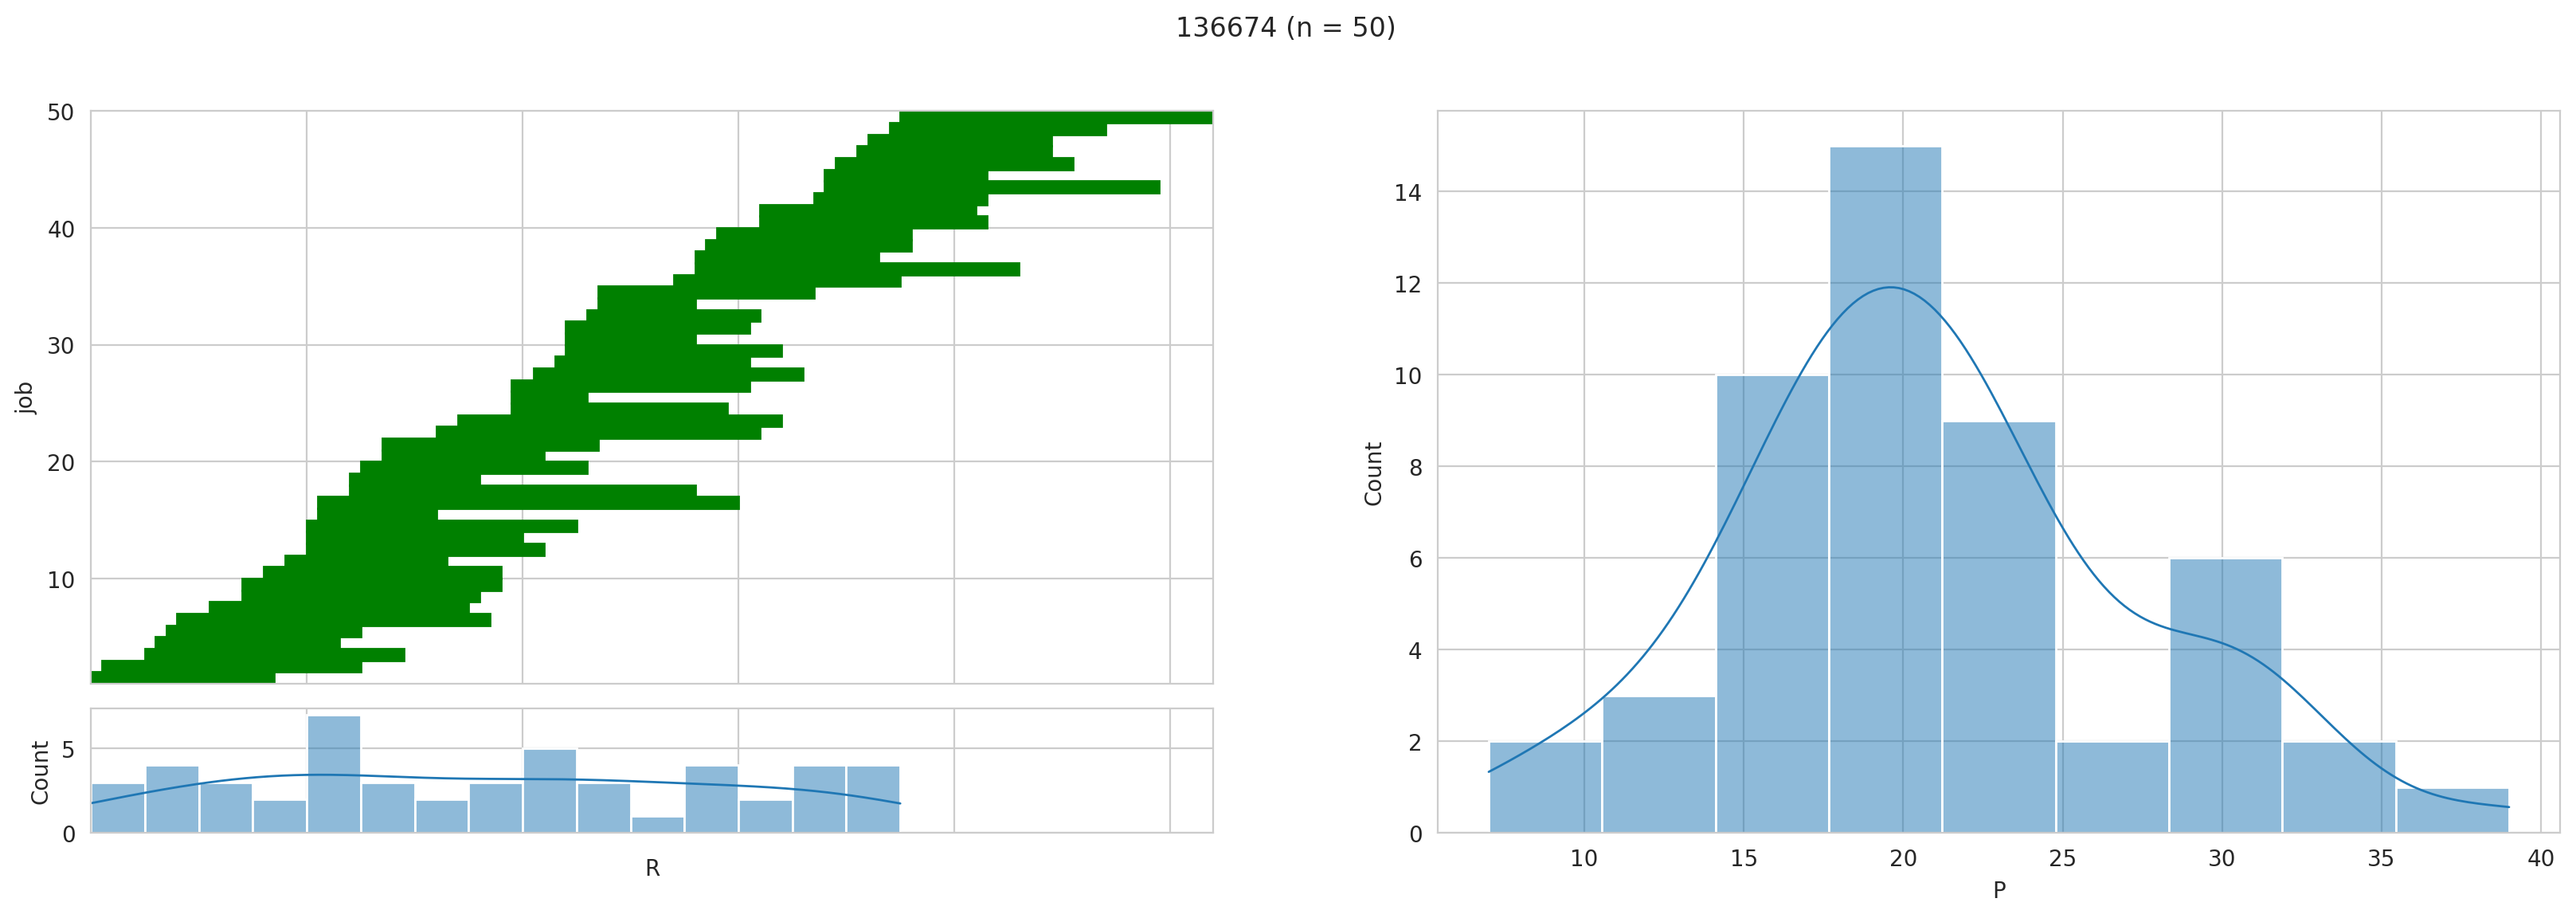

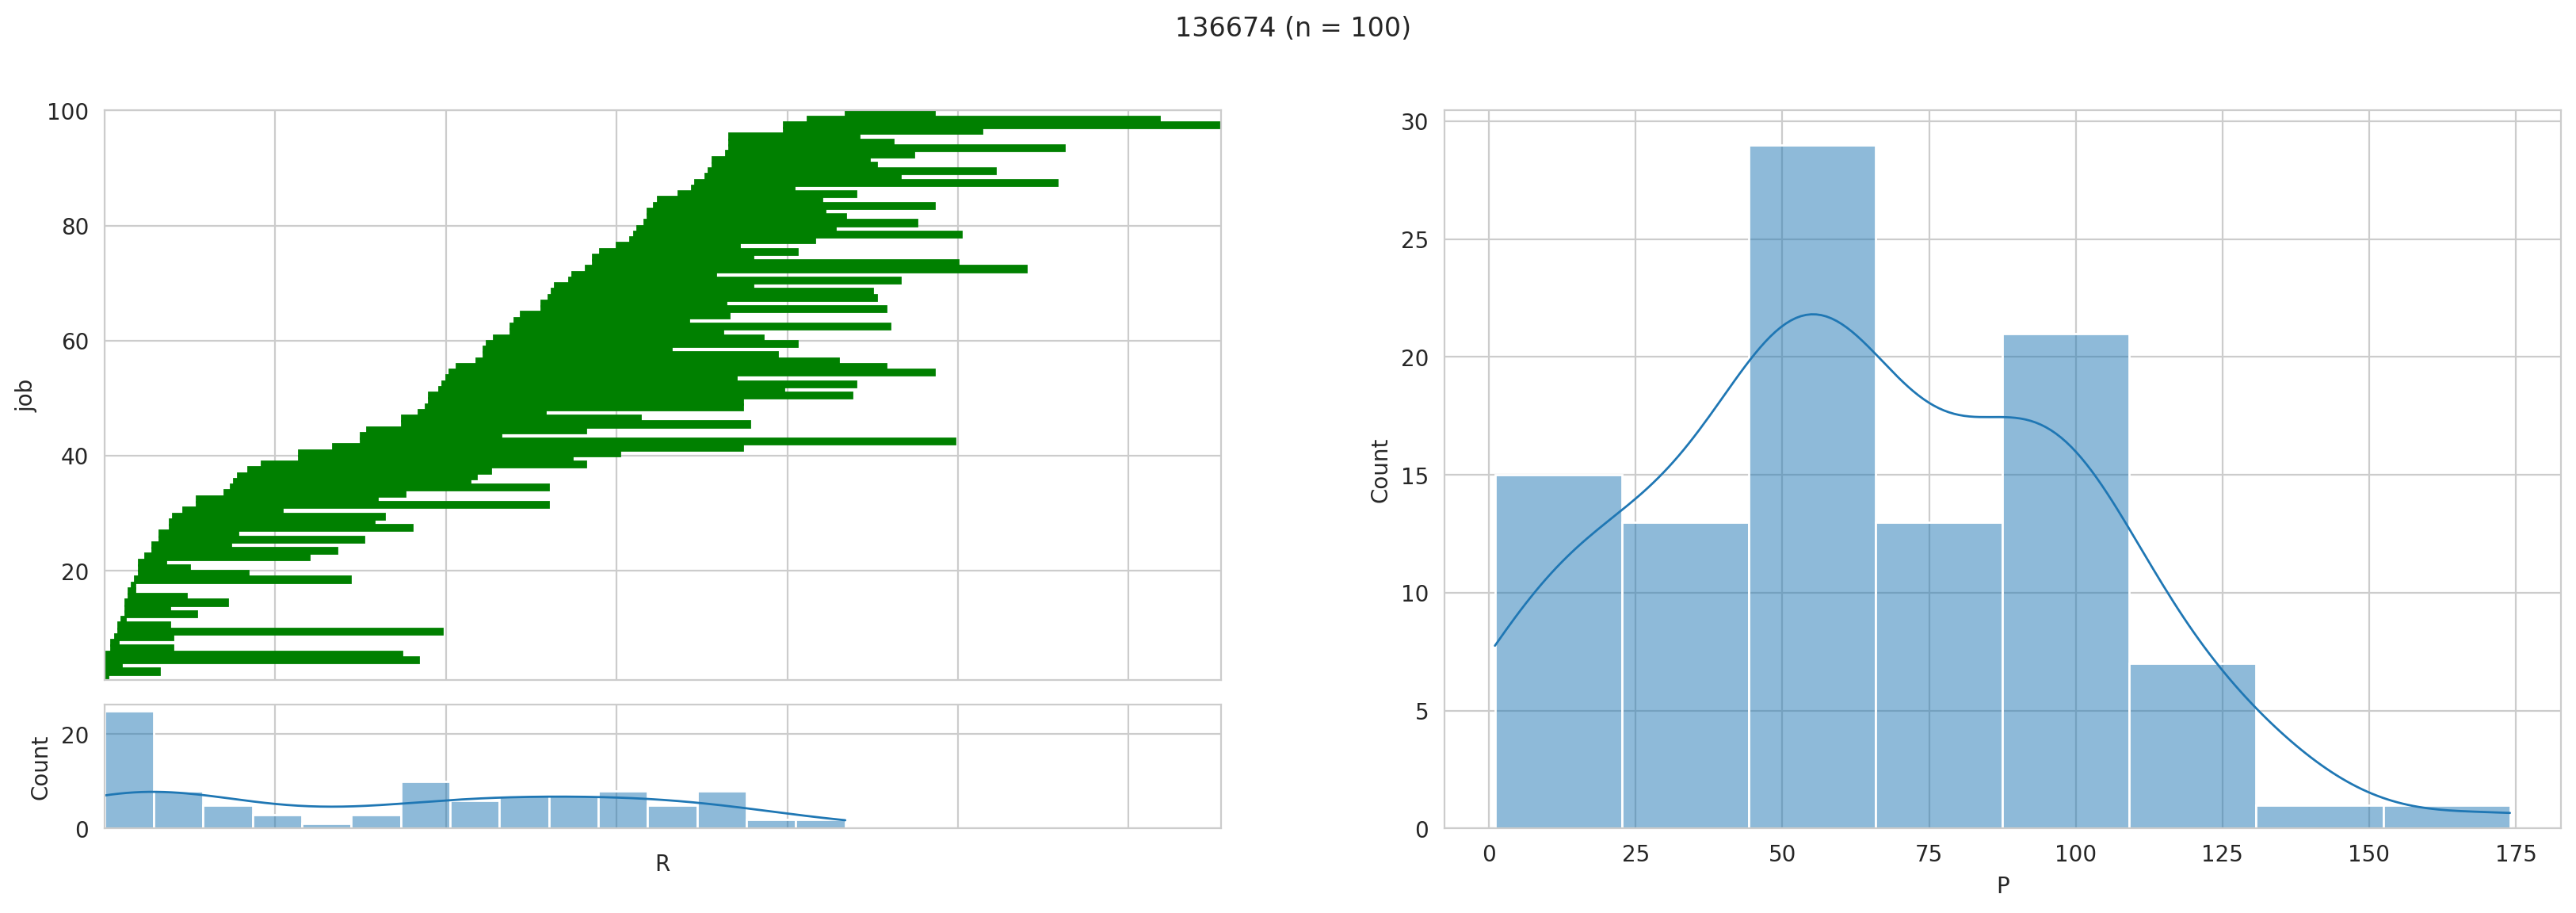

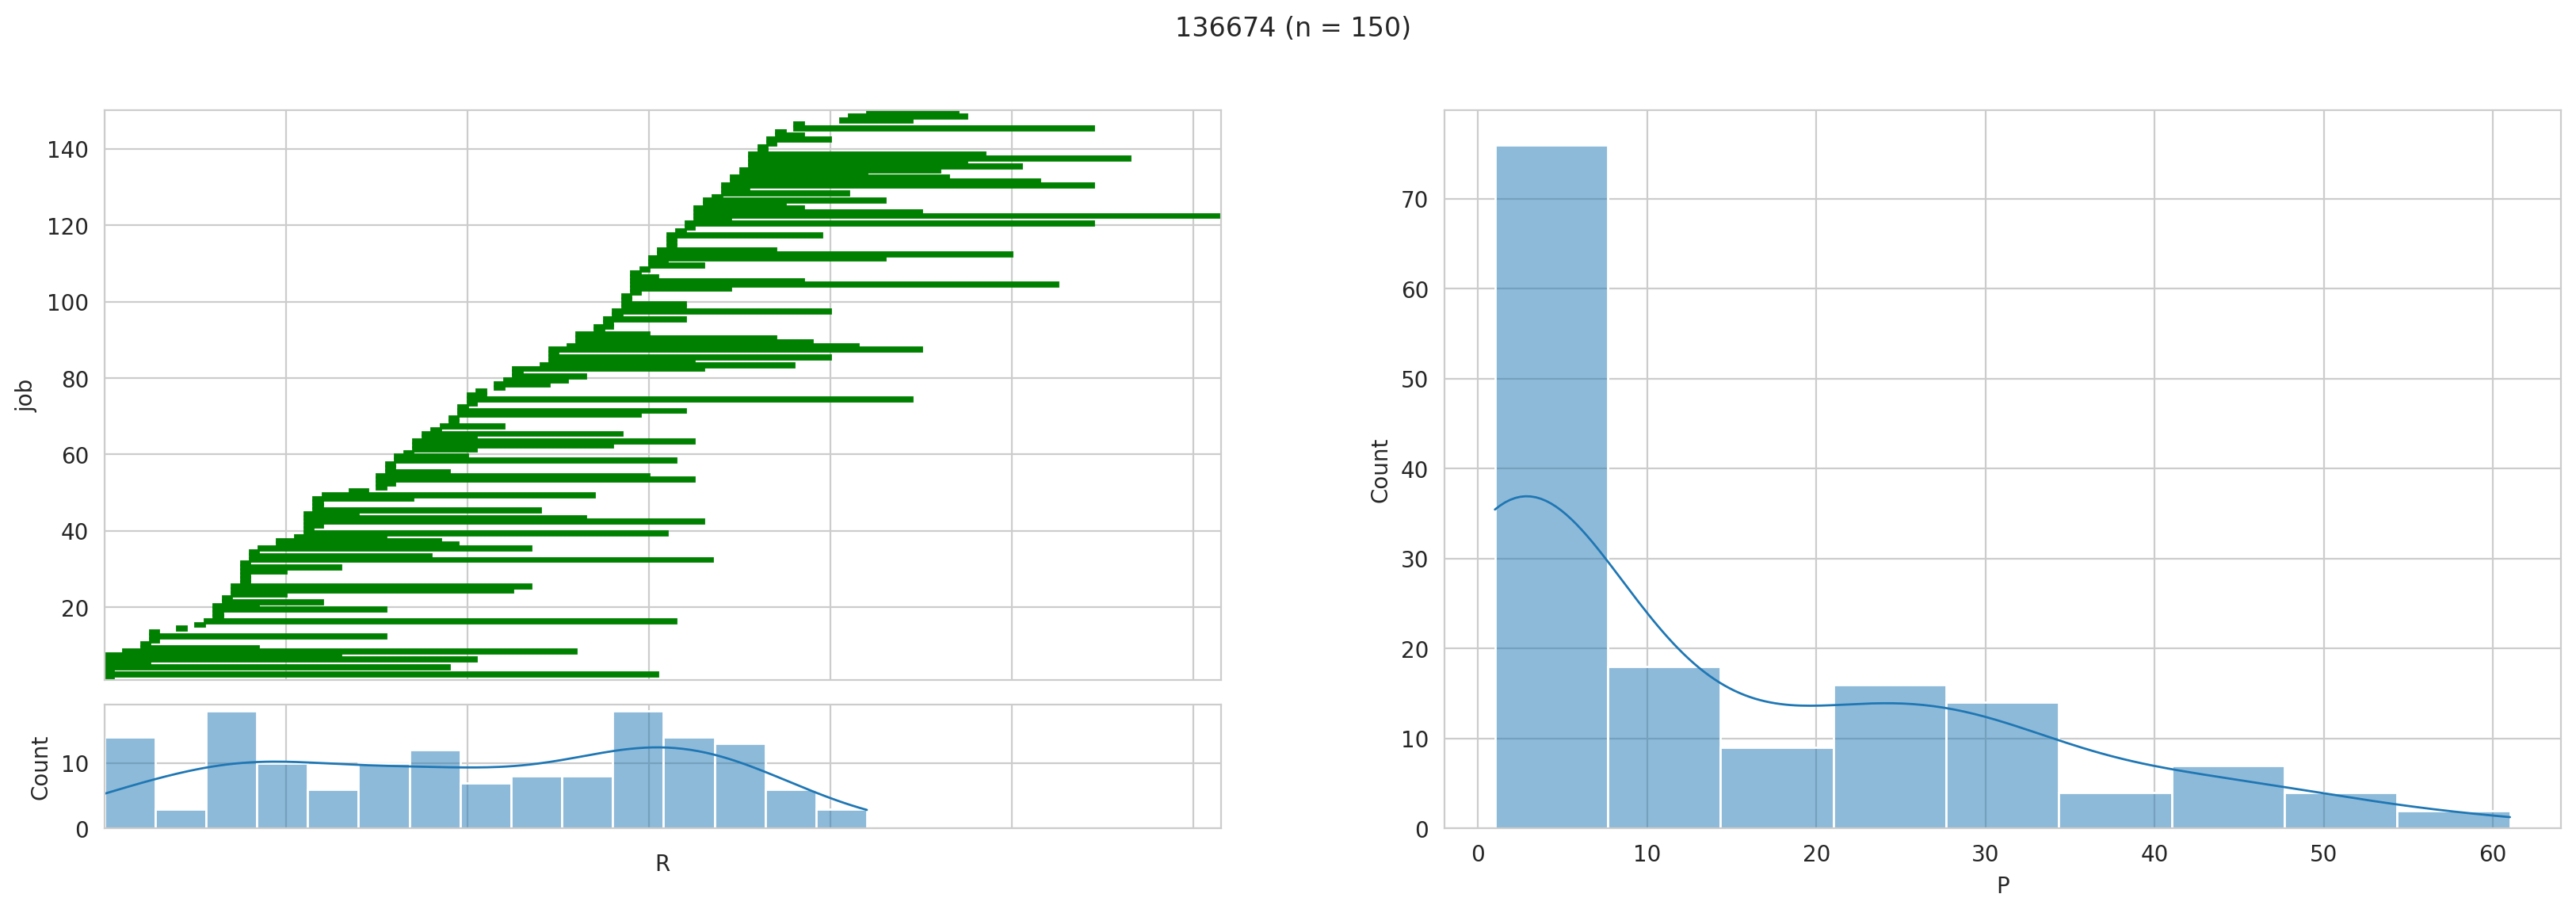

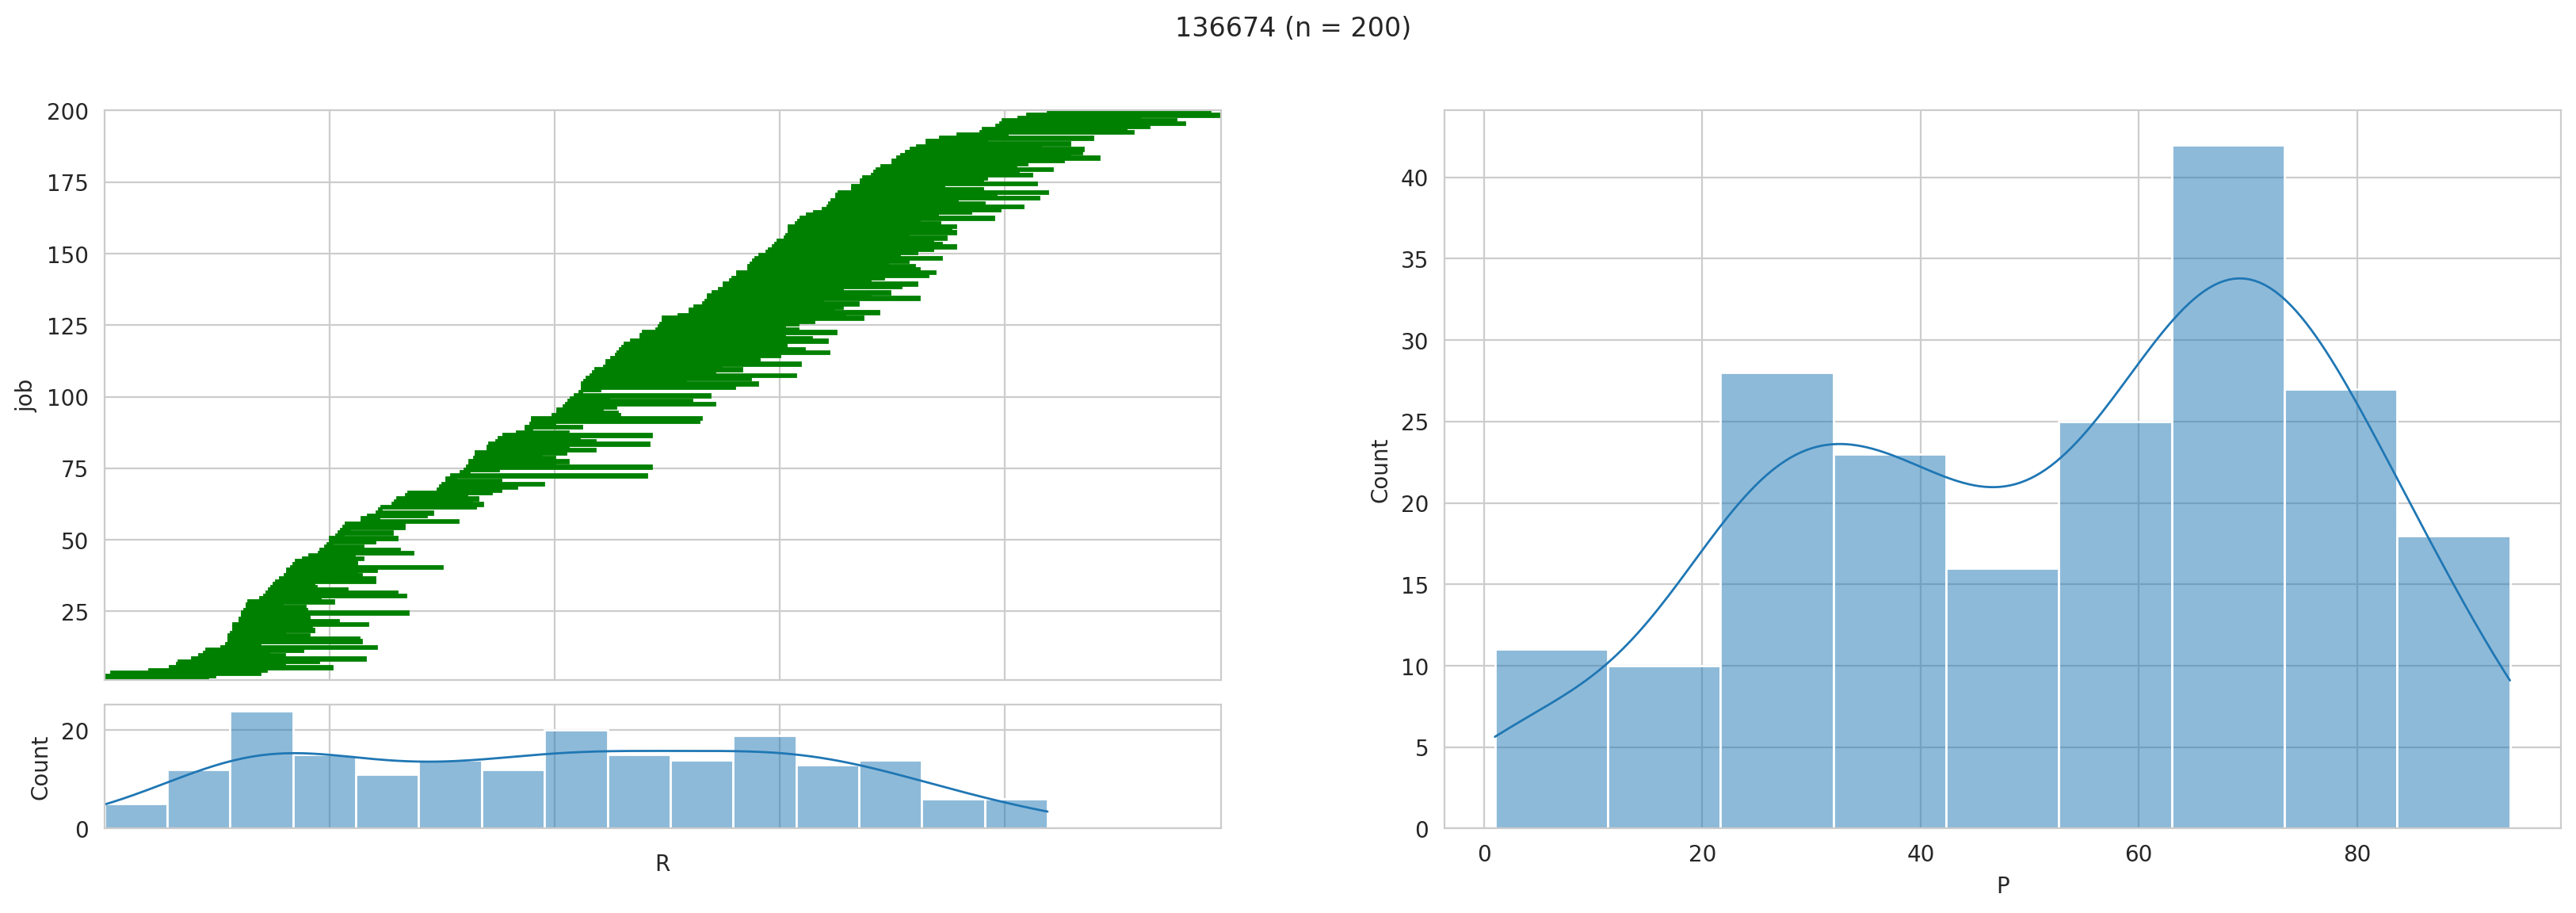

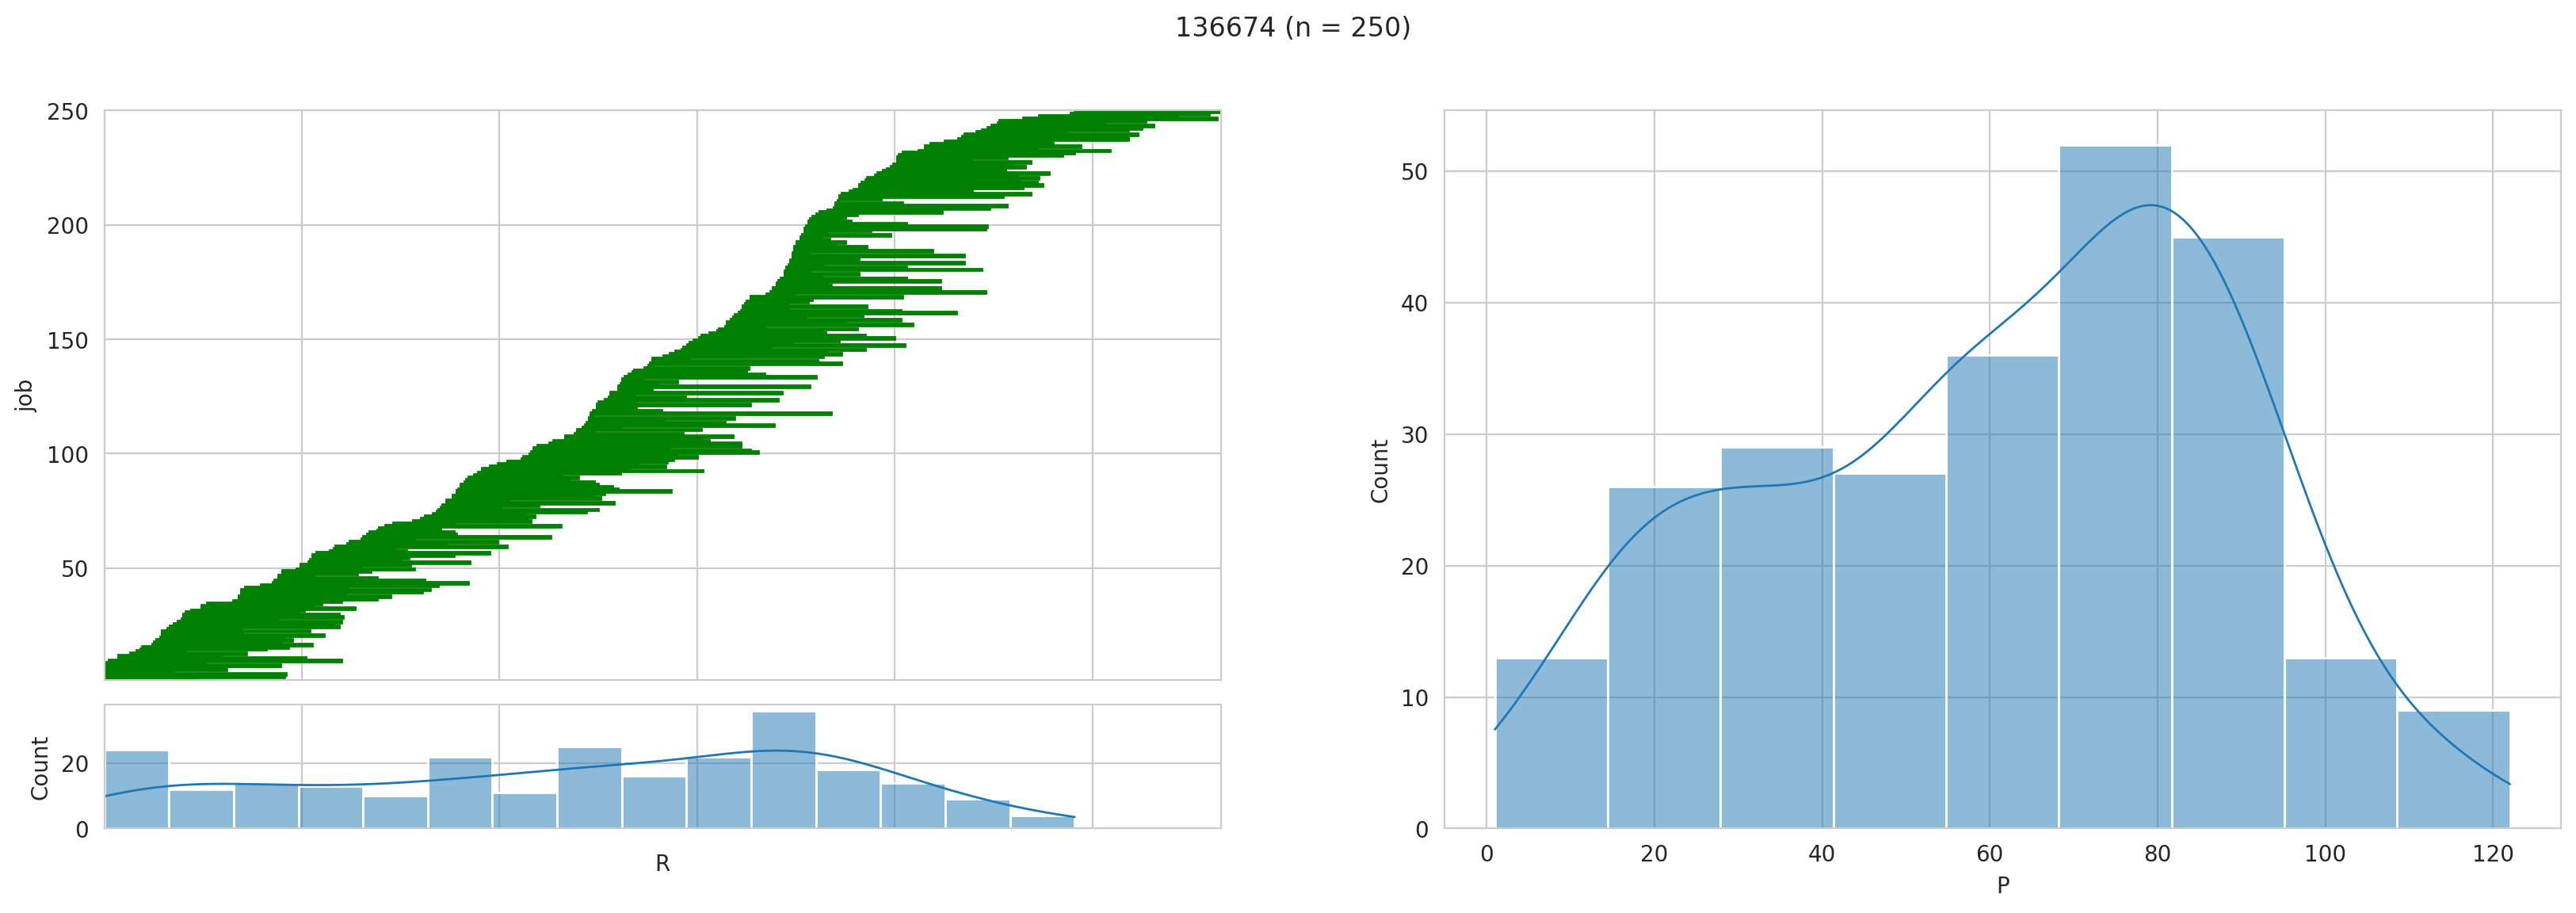

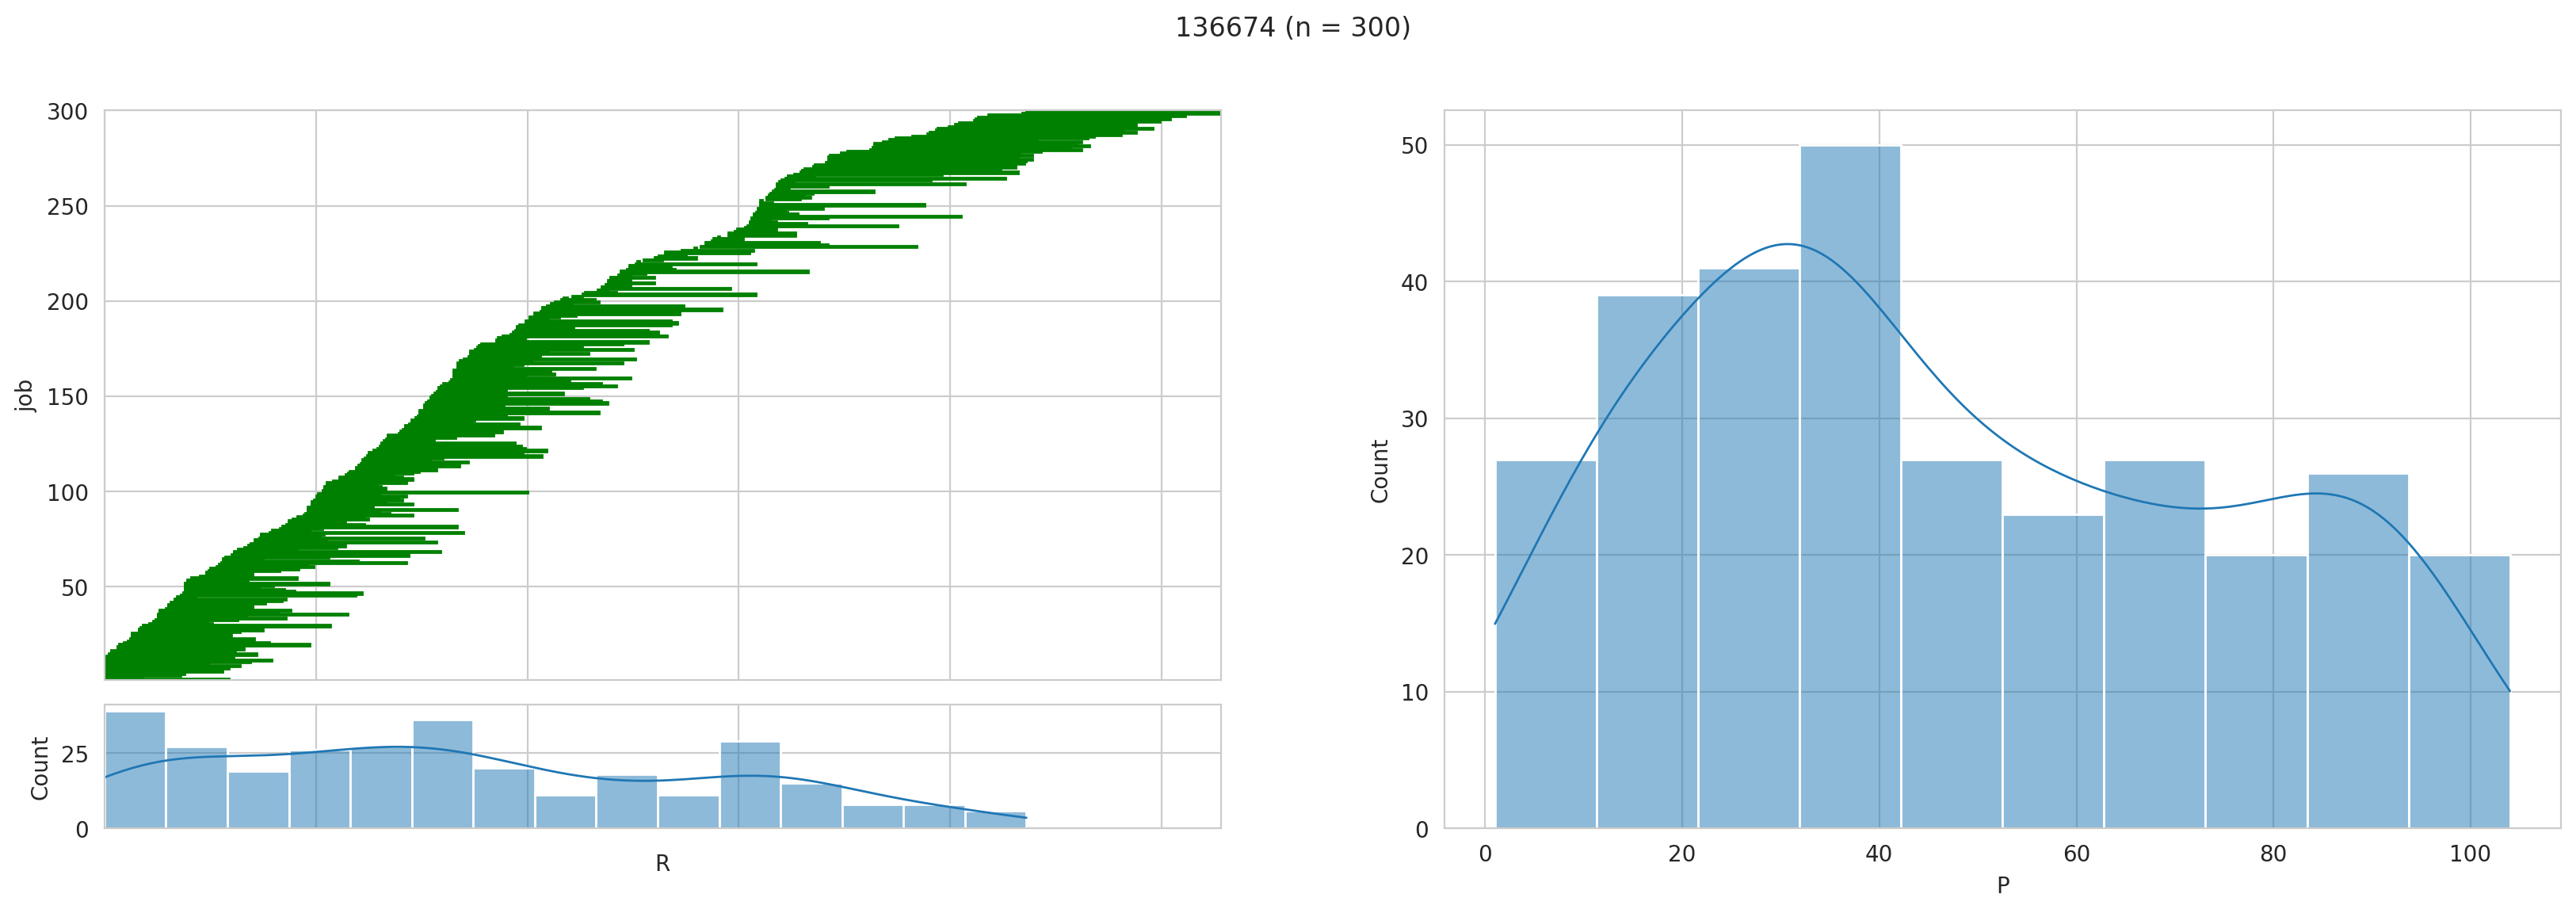

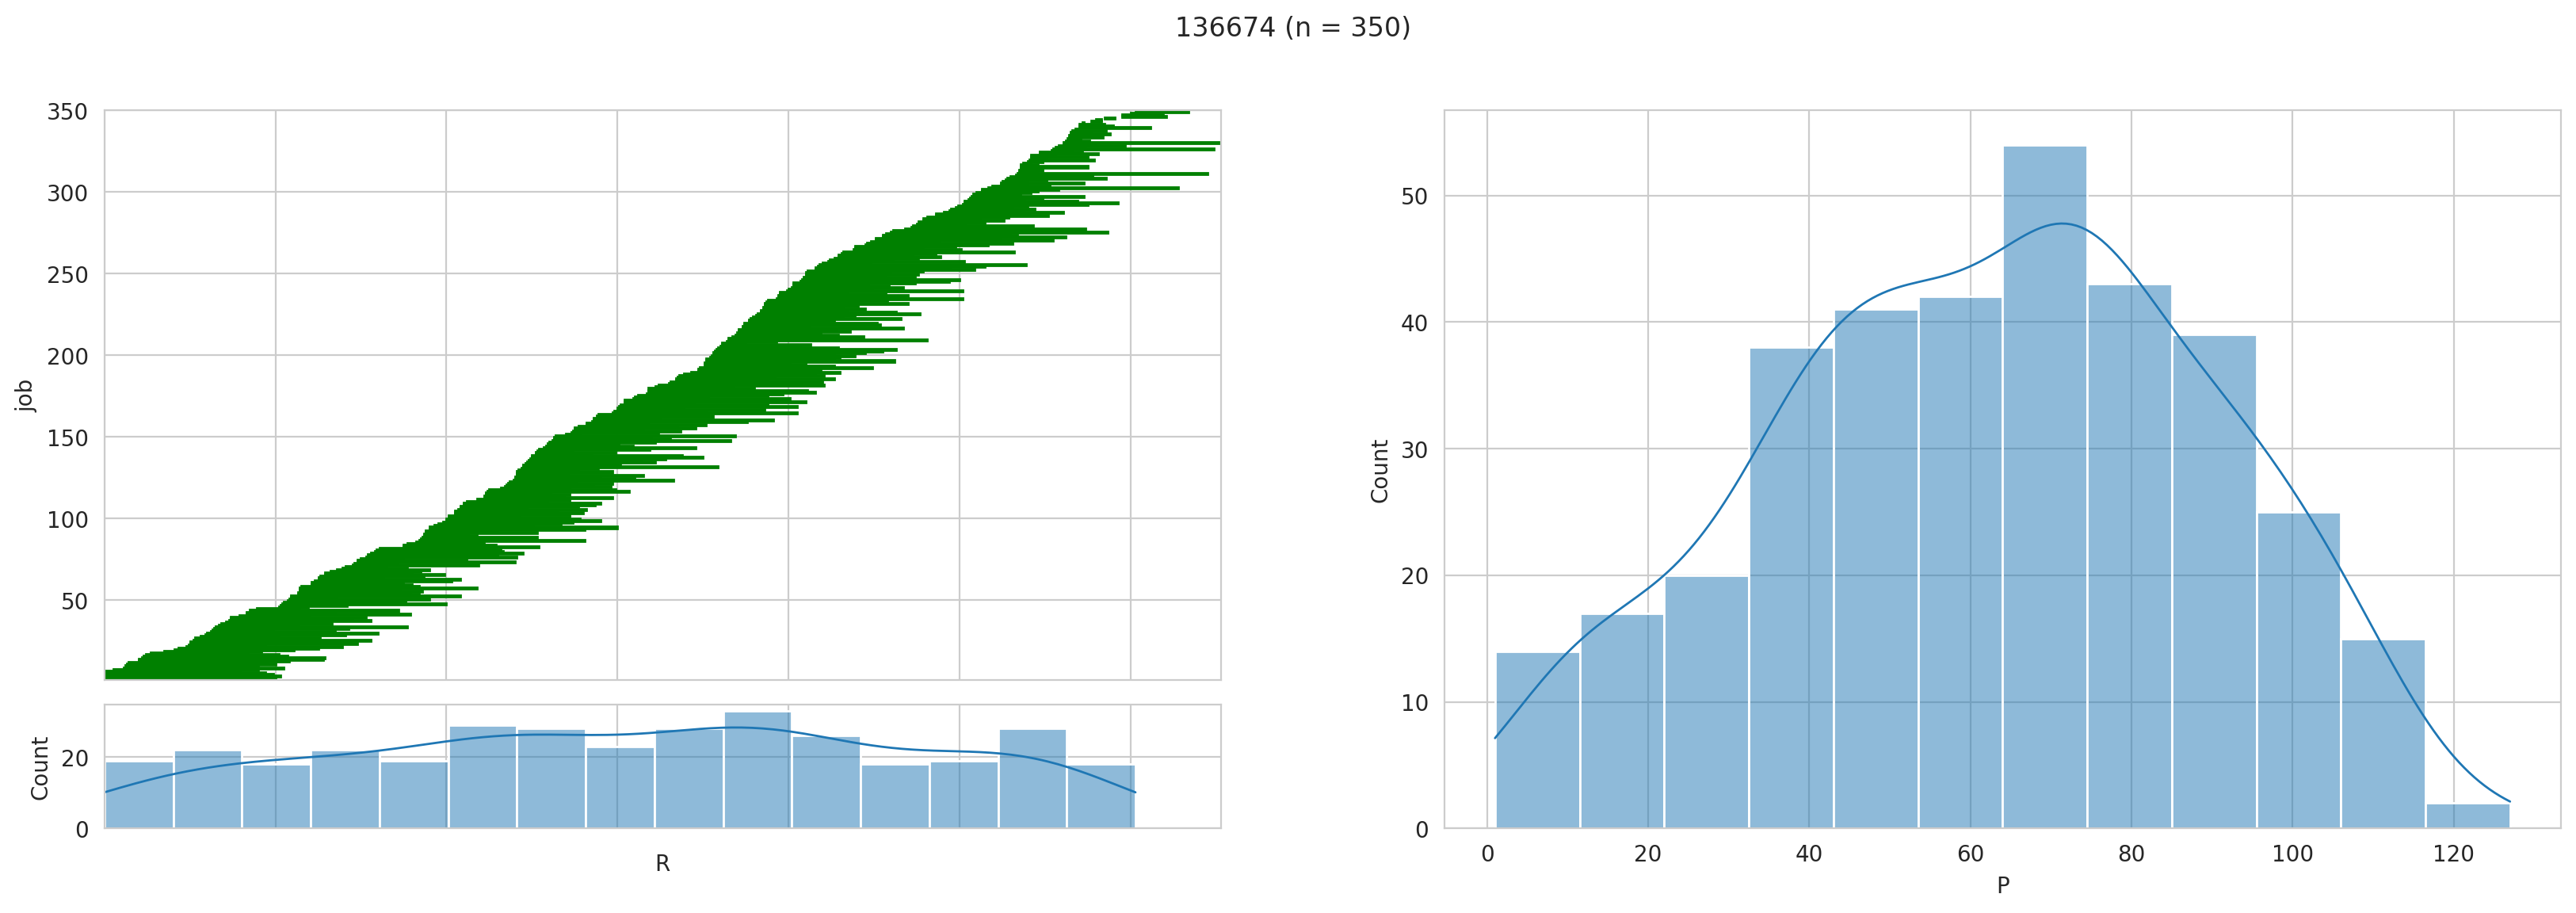

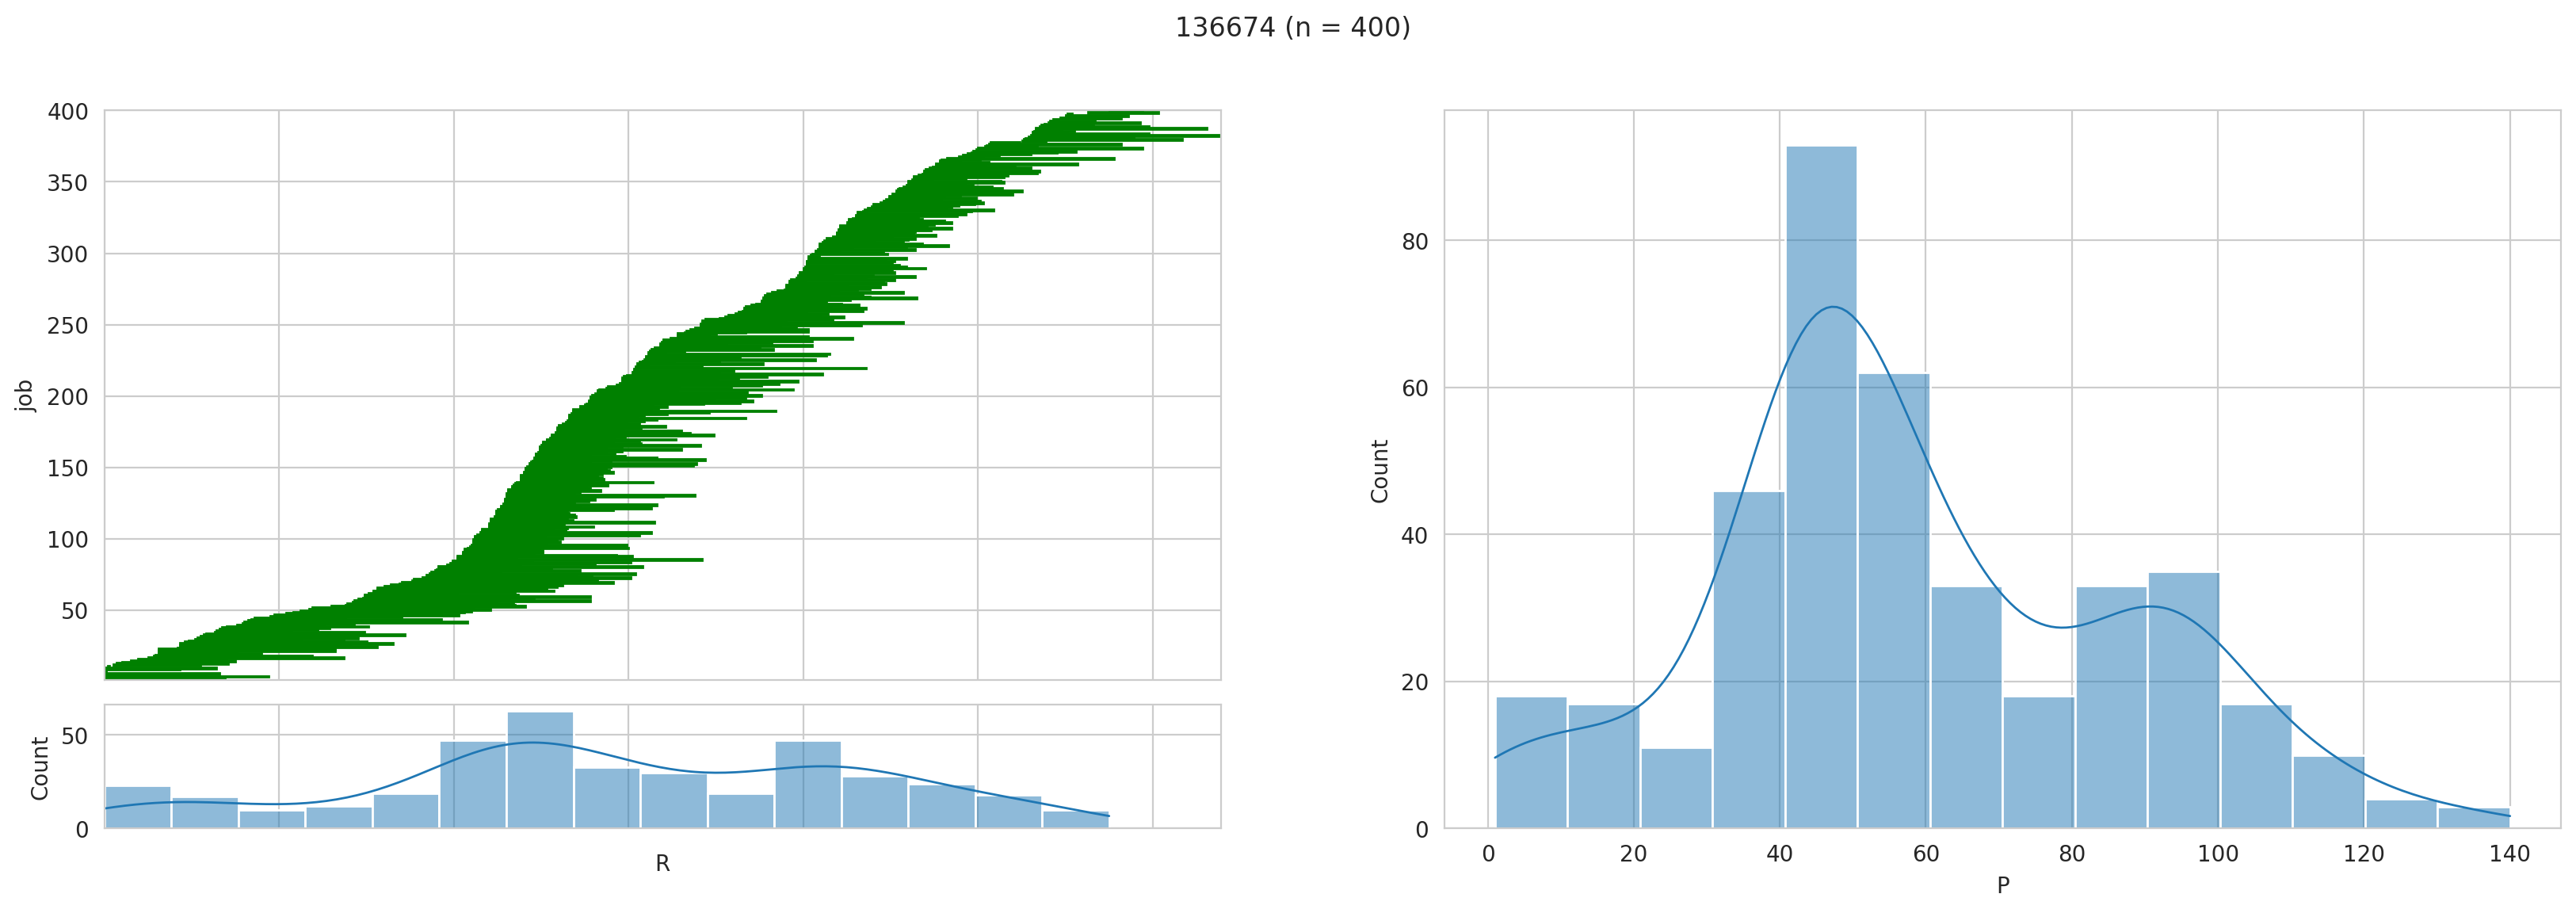

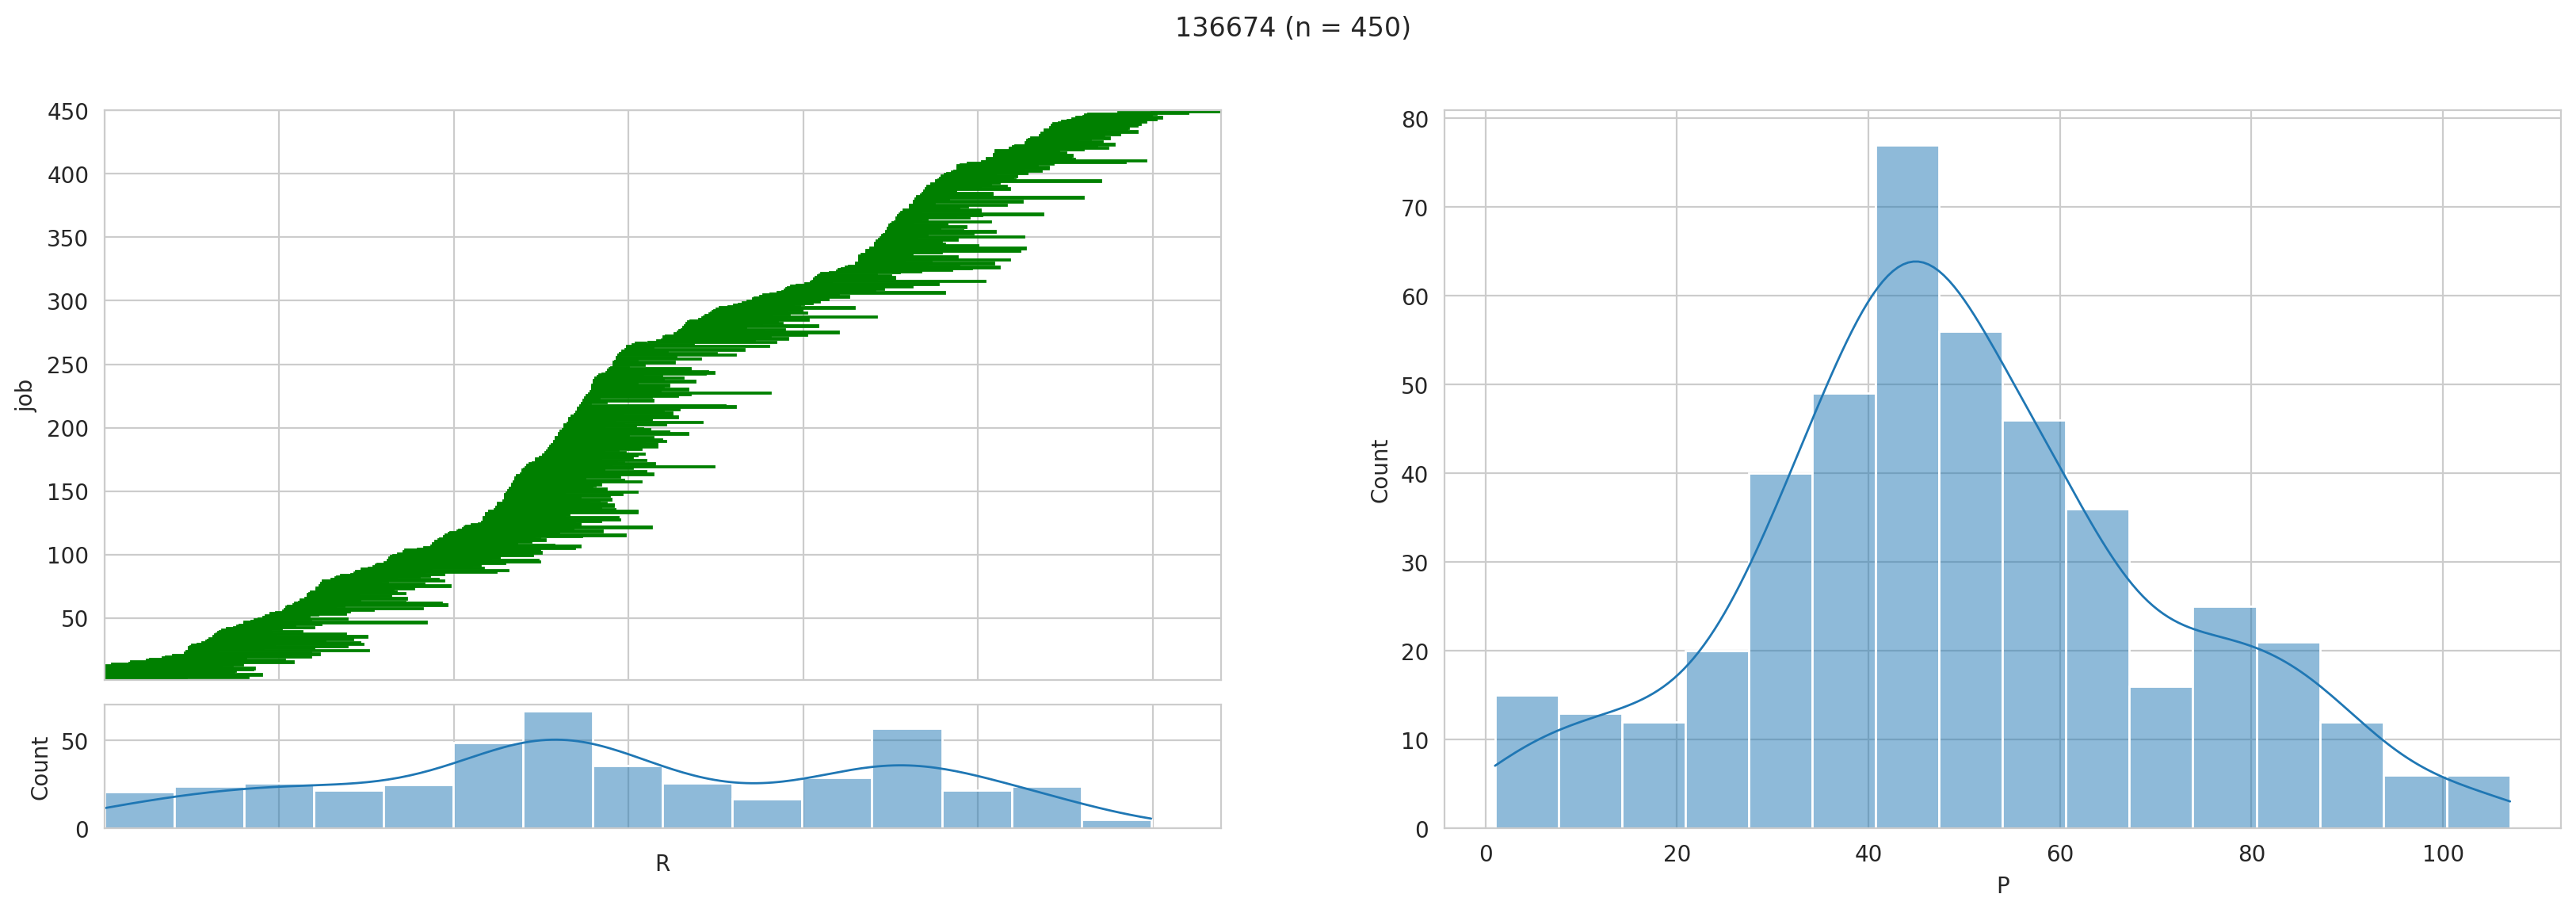

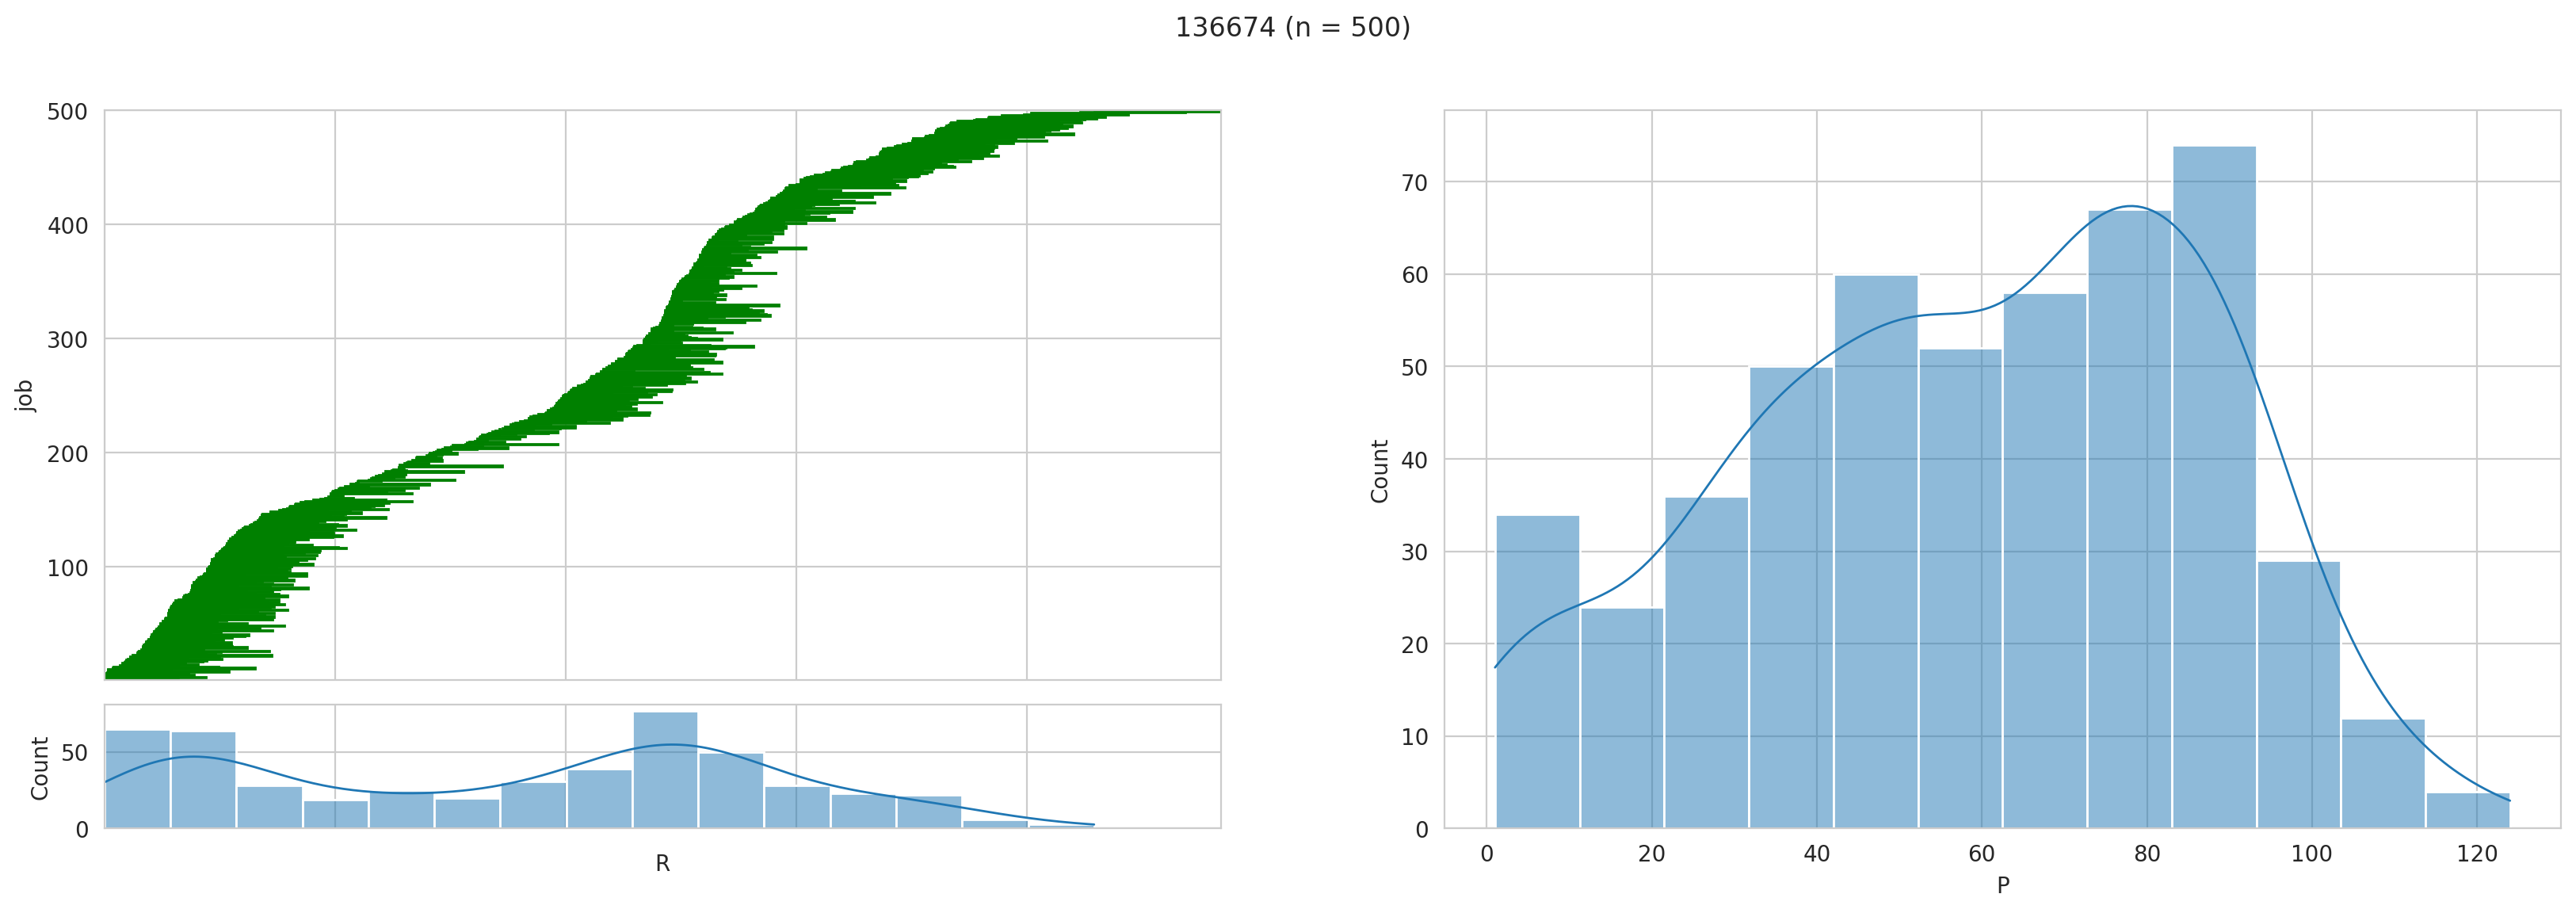

In [434]:
id = '136674'
for n in range(50, 550, 50):
    plot_instance(*readinstance(f'../public/zadanie2/in/{id}/{id}_{n}.txt'))
    plt.suptitle(f'{id} (n = {n})')
    plt.show()

In [ ]:
n = 400
for id in indices:
    plot_instance(*readinstance(f'../public/zadanie2/in/{id}/{id}_{n}.txt'))
    plt.suptitle(f'{id} (n = {n})')
    plt.show()

loss = 20.875162147793727 (ok)
expected score = 21
computed score = 20.875162147793727
delta score = 0.12 ok
gaps = [2.0, 0.0, 0.0, 5.1111111111111125, 0.6842105263157894]


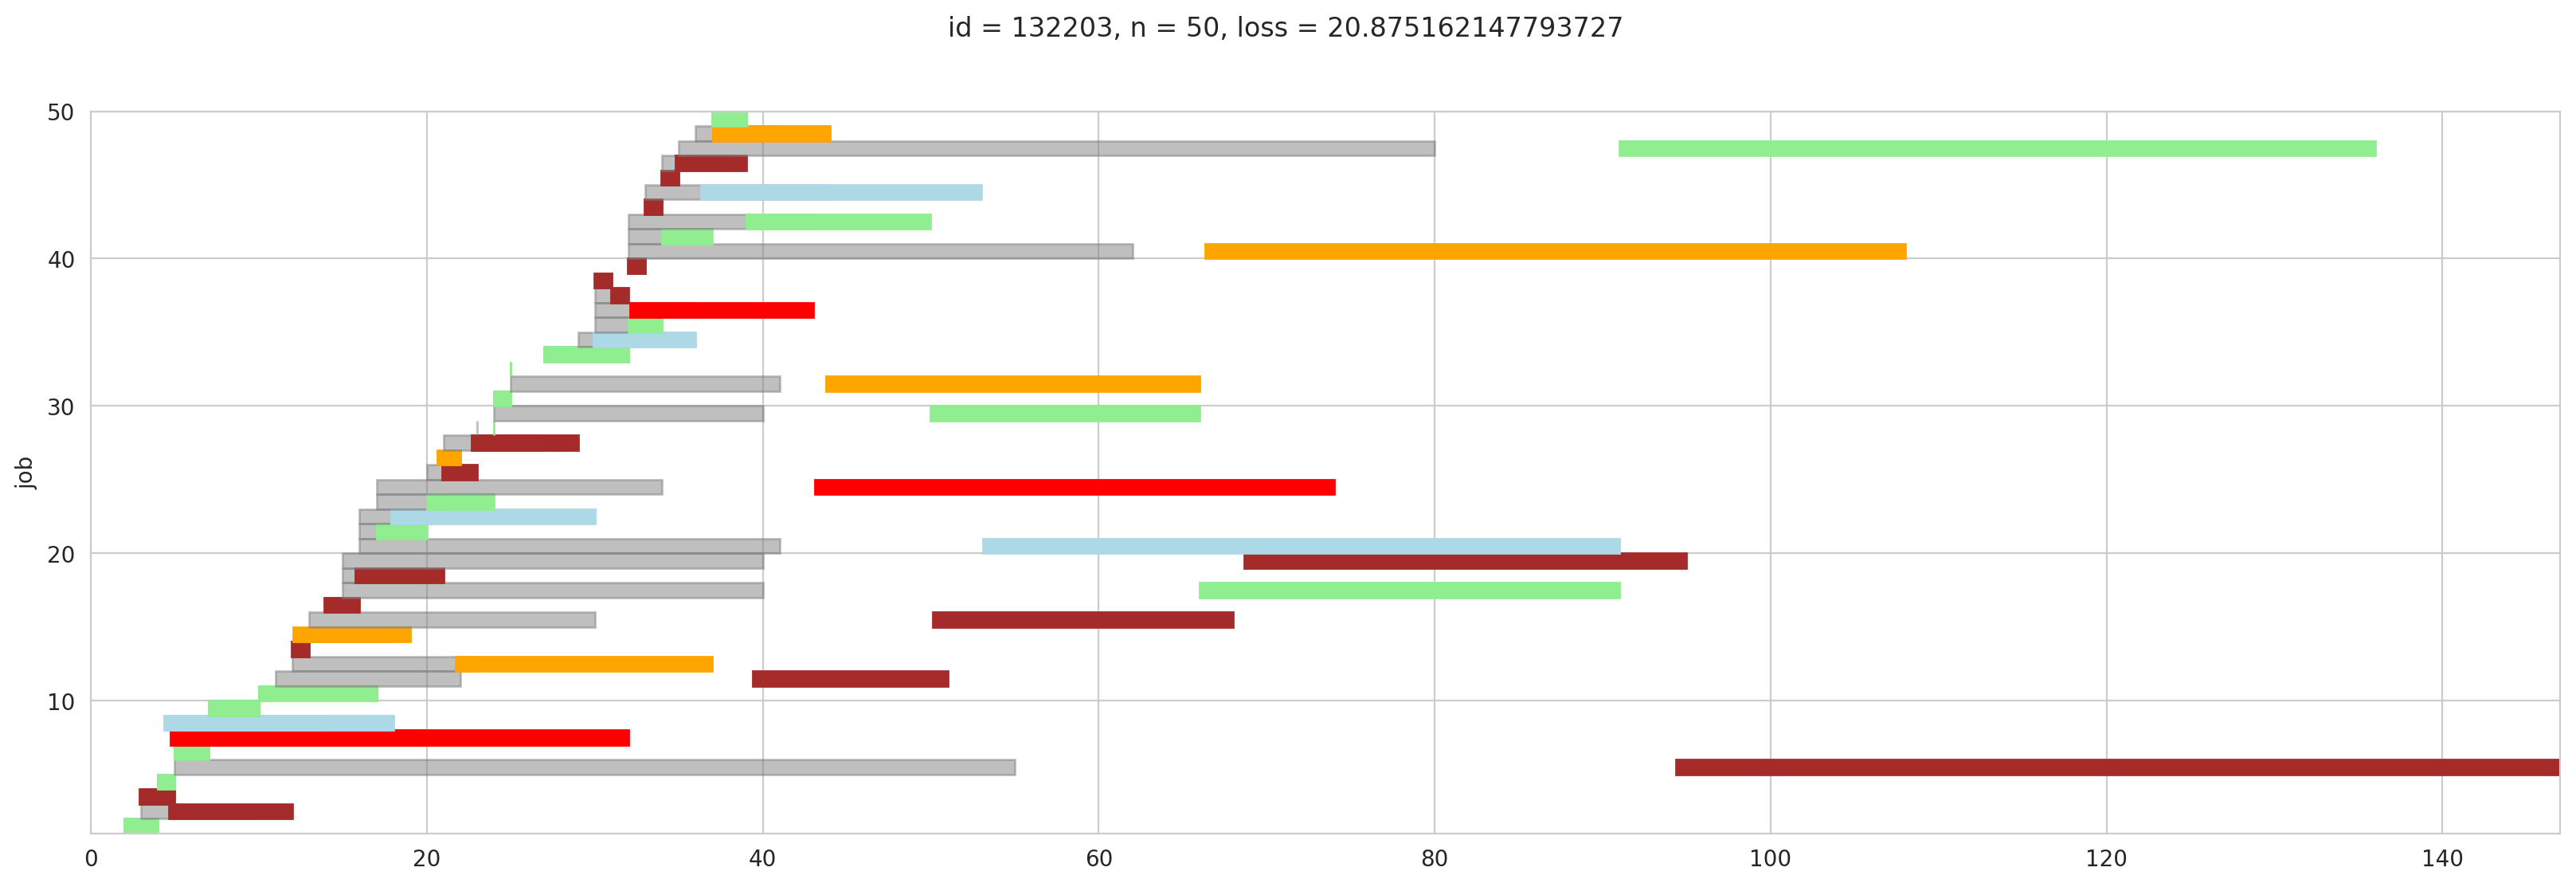

In [19]:
debug_solution('136698', '132203', 50)